
**Prueba Técnica Data Engineer**

Presentado por: Buitrago Castillo Zuly

---
**Proyecto:** 
Sistema de consultas 

---

In [77]:
# modulos
from pyathena import connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#conexión
conn = connect(s3_staging_dir='s3://technicaltestbucket/transformed_data/',
region_name='us-east-2')

## Consultas

### 1. ¿Cómo están distribuidos los registros por ciudad?

In [34]:
View_registros_ciudad = pd.read_sql('SELECT * FROM "inmuebles"."View_registros_ciudad" ', conn)
print('Solo muestra los primeros 10 registros, esta consulta tiene en total',len(view_value_Max_Min.index),'registros')
View_registros_ciudad.head(10)

Solo muestra los primeros 10 registros, esta consulta tiene en total 55 registros


,ciudad,registros_ciudad
0,Envigado,63
1,Sabaneta,57
2,Bogota,51
3,Medellín,43
4,Cartagena,34
5,Barranquilla,31
6,Bello,21
7,Armenia,19
8,Rionegro,18
9,Itagüí,16


### ¿Cuál es el valor de venta y arriendo máximo y mínimo por ciudad?

In [52]:
view_value_Max_Min = pd.read_sql('SELECT * FROM "inmuebles"."view_value_Max_Min" ', conn)
view_value_Max_Min=view_value_Max_Min.fillna(0)
cols=['max_venta','min_venta','max_arriendo','min_arriendo']
for col in cols:
    view_value_Max_Min[col] = view_value_Max_Min[col].apply(lambda x: f'${x/1000000:.1f} M' if x/1000000>=1 else f'${int(x/1000)}K' if x/10000>=1 else f'${x}')

print('Solo muestra los primeros 10 registros, esta consulta tiene en total',len(view_value_Max_Min.index),'registros')
view_value_Max_Min.head(10)

Solo muestra los primeros 10 registros, esta consulta tiene en total 55 registros


,ciudad,max_venta,min_venta,max_arriendo,min_arriendo
0,Armenia,$430.0 M,$100.0 M,$1.4 M,$620K
1,Barrancabermeja,$110.0 M,$110.0 M,$0.0,$0.0
2,Barranquilla,$980.0 M,$155.0 M,$4.5 M,$950K
3,Bello,$360.0 M,$119.8 M,$1.1 M,$680K
4,Bogota,$3500.0 M,$205.0 M,$10.0 M,$1.2 M
5,Bolívar,$698.0 M,$698.0 M,$0.0,$0.0
6,Cajicá,$2300.0 M,$190.0 M,$0.0,$0.0
7,Caldas,$0.0,$0.0,$850K,$850K
8,Cali,$410.0 M,$128.0 M,$1.6 M,$700K
9,Candelaria,$109.0 M,$109.0 M,$0.0,$0.0


### 2. ¿Listar el top 10 de los inmuebles más caros en valor de venta que presentan información de baños, antigüedad y área?

In [71]:
Inmuebles_mayor_Valor_e_informacion = pd.read_sql('SELECT * FROM "inmuebles"."Inmuebles_mayor_Valor_e_informacion" ', conn)
Inmuebles_mayor_Valor_e_informacion['valor_venta'] = Inmuebles_mayor_Valor_e_informacion['valorventa'].apply(lambda x: f'${x/1000000:.1f} M' if x/1000000>=1 else f'${int(x/1000)}K' if x/10000>=1 else f'${x}')
display(Inmuebles_mayor_Valor_e_informacion[['id', 'valor_venta', 'num_banos', 'antiguedad', 'area_lote']])


,id,valor_venta,num_banos,antiguedad,area_lote
0,1112373,$2300.0 M,5,13,1000
1,1144603,$950.0 M,3,6,127
2,1180665,$520.0 M,3,3,132
3,1171538,$490.0 M,2,2,73
4,1186673,$395.0 M,3,10,105
5,1127840,$340.0 M,3,25,146
6,1206400,$310.0 M,3,5,108
7,1208585,$308.0 M,2,1,88
8,896747,$245.0 M,2,3,100
9,896749,$210.0 M,2,10,82


Text(0.5, 1.0, 'Mapa de correlación')

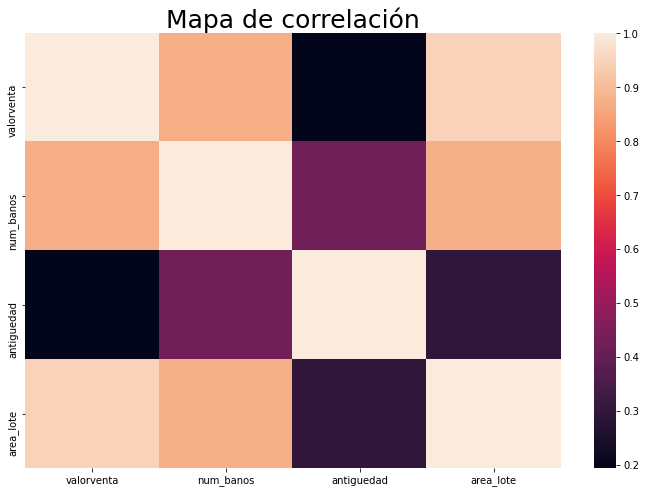

In [74]:
corr = Inmuebles_mayor_Valor_e_informacion.corr()
fig4_1, ax = plt.subplots(figsize =(12,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Mapa de correlación', fontsize=25, color="black")


Se puede observar que el valaor de venta tiene una correlacion positiva con respecto al número de baños y el area del lote. la antiguedad no tiene ningún tipo de influencia con el respecto al valor del imnueble, de hecho la antiguedad con respecto a los demás datos no tiene ninguna relación fuerte sobre estas

### 3.Propuesta de arquitectura

<img src='https://github.com/zbuitrago/habi/blob/main/Propuesta%20de%20arquitectura.png?raw=true' />


1. Se carga la información a un bucket de S3 sin estructura
2. Se emplea AWS Glue o tambien puede ser funciones lambda para crear el proceso de ETL
3. El resultado del ETL se puede almacenar en un nuevo bucket S3, con los datos ya estructurados o semiestructurados
4. Por medio de Athena se puede crear las diferentes consultas y guardaslas en vistas para reducir los costos de ejecución
5. Estos consultas pueden ser acceder por medio de jupyter o herramientas de BI que maneja AWS, para poder a dispoción los datos para los grupos de analitica o BI 